# Модель многоклассовой классификации для предсказания возраста посетителей сайтов
<a id='1-bullet'></a>

_____
**Описание исследования**

Необходимо построить модель машинного обучения, которая по данным о поведении анонимного пользователя в цифровой среде будет определять его примерный возраст. Результат модели станет основой для реализации замыслов маркетологов о том, чтобы показывать рекламу на целевую аудиторию определённого возраста и снизить риски показа рекламы для взрослых несовершеннолетним.
_____
**Цель исследования**

- Разработать и обучить модель машинного обучения для классификации возрастных групп анонимных пользователей на основе их цифрового поведения.
- Целевая переменная: age_category (многоклассовый признак, указывающий возрастую категорию пользователя).
- В качестве главной метрики будет использоваться: F1-мера. Вспомогательные метрики качества: precision и recall. Модель нужно оценить одинаково по всем классам - будет использоваться макро-усреднение.
- Решение должно быть готово к промышленной эксплуатации, поэтому будет сохранен воспроизводимый Pipeline модели, а также файл с функцией для объединения представленной в датасете информации в датафрейм - единое признаковое пространство.
_____
**Задачи исследования**

1. Подготовка среды и библиотек.
2. Исследовательский анализ данных.
3. Предобработка данных.
4. Обучение и оценка базовой модели.
5. Создание и отбор признаков.
6. Подбор гиперпараметров моделей.
7. Подготовка артефактов модели для внедрения.
8. Выводы о результатах работы.

_____
**Исходные данные**

Таблица users:
- user_id - уникальный идентификатор пользователя.
- age_category - возрастная категория пользователя, этот показатель модель должна научиться предсказывать. Содержит следующие категории: 
    
    0: младше 18;

    1: 18-25 лет;
    
    2: 26-40 лет;
    
    3: 41-55 лет;
    
    4: 56+ лет.

Таблица visits:
- date - дата посещения сайта.
- daytime - анонимизированное время посещения сайта. Категории: утро, день, вечер, ночь.
- session_id - уникальный идентификатор сессии. Сессия - это последовательность действий пользователя на сайте, которая начинается при первом взаимодействии с ресурсом и завершается по правилам тайм-аута или смены условий.
- user_id - уникальный идентификатор пользователя.
- website_category - анонимизированная категория сайта. В лог включены несколько десятков категорий, которые позволяют эффективно сегментировать аудиторию. Это позволяет сократить пространство признаков модели без потери её качества.

Таблица ads_activity:
- user_id - уникальный идентификатор пользователя.
- ads_activity - характеристика CTR, выраженная одним из значений: очень редко, редко, умеренно, часто, очень часто.

Таблица surf_depth:
- user_id - уникальный идентификатор пользователя.
- surf_depth - категориальная переменная, характеризующая глубину перехода пользователя по сайтам во время одной сессии. Содержит категории поверхностно, средне, глубоко.

Таблица primary_device:
- user_id - уникальный идентификатор пользователя.
- primary_device - информация о типе основного устройства пользователя для выхода в Интернет.

Таблица cloud_usage:
- user_id - уникальный идентификатор пользователя;
- cloud_usage - True означает, что пользователь обращается к облачным ресурсам типа Яндекс 360 прямо или через посещаемые сайты.

______

**Данное исследование разделим на несколько частей**

***Часть 0. Постановка задачи машинного обучения:***
* [1. Формулировка задачи](#1-bullet)

***Часть 1. Подготовка среды и библиотек***
* [1. Подготовка библиотек](#2-bullet)
* [2. Фиксация констант для воспроизводимости](#3-bullet)
* [3. Загрузка данных](#4-bullet)

***Часть 2. Исследовательский анализ данных (EDA)***
* [1. Анализ целевой переменной](#5-bullet)
* [2. Анализ пропусков и дубликатов](#6-bullet)
* [3. Анализ данных датасетов](#7-bullet)
* [4. Анализ сессий по логам](#8-bullet)
* [5. Общая статистика всех пользователей по логам](#9-bullet)
* [6. Создание новых признаков](#10-bullet)
* [7. Функция для объединения таблиц](#11-bullet)
* [8. Общий анализ объединенного датафрейма](#12-bullet)
* [9. Анализ категориальных признаков](#13-bullet)
* [10. Анализ матрицы корреляций](#14-bullet)
* [11. Итог EDA](#15-bullet)

***Часть 3. Предобработка данных***
* [1. Создание итогового датафрейма](#16-bullet)
* [2. Разделение на выборки](#17-bullet)
* [3. Создание Pipeline](#18-bullet)

***Часть 4. Обучение и оценка базовой модели***
* [1. Разделение на стратифицированные фолды](#19-bullet)
* [2. Функции для оценки модели](#20-bullet)
* [3. Создание базовой модели](#21-bullet)
* [4. Обучение многоклассовой логистической регрессии](#22-bullet)

***Часть 5. Oтбор признаков***
* [1. Доработка Pipeline. Обучение многоклассовой логистической регрессии](#23-bullet)

***Часть 6. Подбор гиперпараметров моделей***
* [1. Перебор гиперпараметров через Grid Search Cross Validate](#24-bullet)
* [2. Вывод топ-10 лучших моделей с их метриками и гиперпараметрами](#25-bullet)

***Часть 7. Финальная модель***
* [1. Вывод лучших гиперпараметров](#26-bullet)
* [2. Финальная проверка модели на тестовой выборке](#27-bullet)

***Часть 8. Подготовка артефактов модели для внедрения***
* [1. Локальное сохранение модели](#28-bullet)
* [2. Применение метода калибровки](#29-bullet)

***Часть 9. Выводы о результатах работы***
* [1. Выводы](#30-bullet)

---

## Подготовка среды и библиотек
<a id='2-bullet'></a>

#### 1.1 Подготовка библиотек


Установка библиотек

<a id='2-bullet'></a>

In [1]:
from pathlib import Path

req_path = Path("../../requirements.txt")
if req_path.exists():
    %pip install -qr {req_path}
else:
    %pip install -qU scikit-learn numpy pandas matplotlib seaborn phik joblib category_encoders

Note: you may need to restart the kernel to use updated packages.


Импорт библиотек

<a id='3-bullet'></a>

In [2]:

import joblib
import sys

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from phik import phik_matrix
from category_encoders import TargetEncoder

import sklearn
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold, GridSearchCV, cross_val_predict
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif, VarianceThreshold, RFE
from sklearn.compose import ColumnTransformer
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

from IPython.display import display

pd.set_option('display.max_columns', None)

---
<a id='3-bullet'></a>

#### 1.2 Фиксация констант для воспроизводимости

In [3]:
RANDOM_STATE=42

---
<a id='4-bullet'></a>

#### 1.3 Загрузка данных

In [4]:
def get_dfs(dir_path):
    users = pd.read_csv(dir_path / 'ds_s13_users.csv')
    visits = pd.read_csv(dir_path / 'ds_s13_visits.csv')
    ads_activity = pd.read_csv(dir_path / 'ads_activity.csv')
    surf_depth = pd.read_csv(dir_path / 'surf_depth.csv')
    primary_device = pd.read_csv(dir_path / 'primary_device.csv')
    cloud_usage = pd.read_csv(dir_path / 'cloud_usage.csv')
    
    return users, visits, ads_activity, surf_depth, primary_device, cloud_usage

dir1 = Path('./datasets')
dir2 = Path('/datasets')

if dir1.exists():
    (users_df, 
     visits_df, 
     ads_activity_df, 
     surf_depth_df, 
     primary_device_df, 
     cloud_usage_df) = get_dfs(dir1)
elif dir2.exists():
    (users_df, 
     visits_df, 
     ads_activity_df, 
     surf_depth_df, 
     primary_device_df, 
     cloud_usage_df) = get_dfs(dir2)
else:
    raise "Путь до датасета неверный"

In [5]:
users_df.info()
display(users_df.head())
print()
visits_df.info()
display(visits_df.head())
print()
ads_activity_df.info()
display(ads_activity_df.head())
print()
surf_depth_df.info()
display(surf_depth_df.head())
print()
primary_device_df.info()
display(primary_device_df.head())
print()
cloud_usage_df.info()
display(cloud_usage_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5913 entries, 0 to 5912
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   user_id       5913 non-null   object
 1   age_category  5913 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 92.5+ KB


,user_id,age_category
0,f545-8c95aefe8d3e5548a689-a5b2fd39,4
1,cb48-5a0d6cde4d86ae10637e-c8ceb6ed,2
2,678b-614cd47d854b9d591db2-000b2e50,0
3,4ac0-dad169100b4a29b20818-b26ae7c5,4
4,f19b-9ac21ca973b41ecfa8c3-6a58191d,0



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1065745 entries, 0 to 1065744
Data columns (total 5 columns):
 #   Column            Non-Null Count    Dtype 
---  ------            --------------    ----- 
 0   date              1065745 non-null  object
 1   daytime           1065745 non-null  object
 2   session_id        1065745 non-null  object
 3   user_id           1065745 non-null  object
 4   website_category  1065745 non-null  object
dtypes: object(5)
memory usage: 40.7+ MB


,date,daytime,session_id,user_id,website_category
0,2025-11-01,вечер,066e4e02-8c1f-45eb-a50f-178659abe698,0010-5cf8f6b38a7b6c70a021-009dbcda,Category 17
1,2025-11-01,вечер,0bce1749-3376-439c-9a22-f8ffbba00e9a,0010-5cf8f6b38a7b6c70a021-009dbcda,Category 19
2,2025-11-01,вечер,3445d8c4-221d-4d88-bb6a-a2939fe3c610,0010-5cf8f6b38a7b6c70a021-009dbcda,Category 18
3,2025-11-01,вечер,3bf97286-1d91-4aaa-af4a-ed58eceb8cd2,0010-5cf8f6b38a7b6c70a021-009dbcda,Category 20
4,2025-11-01,вечер,40e22712-3cad-410d-a9f0-13bd8f6911c0,0010-5cf8f6b38a7b6c70a021-009dbcda,Category 05



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5826 entries, 0 to 5825
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   user_id       5826 non-null   object
 1   ads_activity  5826 non-null   object
dtypes: object(2)
memory usage: 91.2+ KB


,user_id,ads_activity
0,e318-d8e69c86b543a5fb927c-c36fb6e6,очень часто
1,35cd-a972339dec534f49332c-a8b6d383,редко
2,f7e6-3b29cf9cb7ed4bb00d8f-81534360,очень редко
3,5186-e25a37549e50f45b2b43-178eaabe,умеренно
4,febd-077f277466253ee04ef6-42656680,умеренно



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5715 entries, 0 to 5714
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     5715 non-null   object
 1   surf_depth  5715 non-null   object
dtypes: object(2)
memory usage: 89.4+ KB


,user_id,surf_depth
0,f238-0c4c1e787cce311541b7-736925a0,поверхностно
1,9030-1b562ad80182b6dc27f1-ce811740,глубоко
2,22e0-7c6cadcc45e246b8688d-c43c9b23,поверхностно
3,9d7f-a19f10756378940a49b5-5d03e1ef,поверхностно
4,4233-bb5ae4b09827e5497094-1a4956af,глубоко



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5669 entries, 0 to 5668
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   user_id         5669 non-null   object
 1   primary_device  5669 non-null   object
dtypes: object(2)
memory usage: 88.7+ KB


,user_id,primary_device
0,d602-ec060db7597a6b8cd4e7-aa625896,смартфон
1,9204-9558455be649d4e77945-b5e25d62,ПК
2,5eea-22babd6a9474b43b9d0b-a39a4cf2,ноутбук
3,c142-0296948e8d08e417de10-2da9523c,смартфон
4,abec-bb4092da51eb2233a928-e44ba074,ПК



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5680 entries, 0 to 5679
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      5680 non-null   object
 1   cloud_usage  5680 non-null   bool  
dtypes: bool(1), object(1)
memory usage: 50.1+ KB


,user_id,cloud_usage
0,a1e4-91c8a52eb855595e653f-298ce305,False
1,db9a-7b8e9e94448b7fcb19b6-4edca15f,False
2,0d55-9ad768879e9b08ca7ff9-843f76c7,True
3,4baa-43285d10a6d3cc969f2a-b21881d1,False
4,b8cd-cbb2411db005115ca64d-32700c62,False


---

## Исследовательский анализ данных (EDA)
<a id='5-bullet'></a>

#### 2.1 Анализ целевой переменной

In [6]:
age_cat_desc = users_df['age_category'].describe()

age_cat_desc

count    5913.000000
mean        2.441569
std         1.380322
min         0.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         4.000000
Name: age_category, dtype: float64

In [7]:

def show_bar_plot(value_counts, name, xlabel='Признак'):
    ax = value_counts.plot(
        kind='bar',
        title=f'Распределение {name}',
        xlabel=xlabel,
        ylabel='Количетсво',
        rot=30,
        figsize=(14, 4)
    )

    ax.bar_label(ax.containers[0], label_type='center')
    ax.grid(axis='y', linestyle='--', alpha=0.7)

    plt.show()
    plt.close()

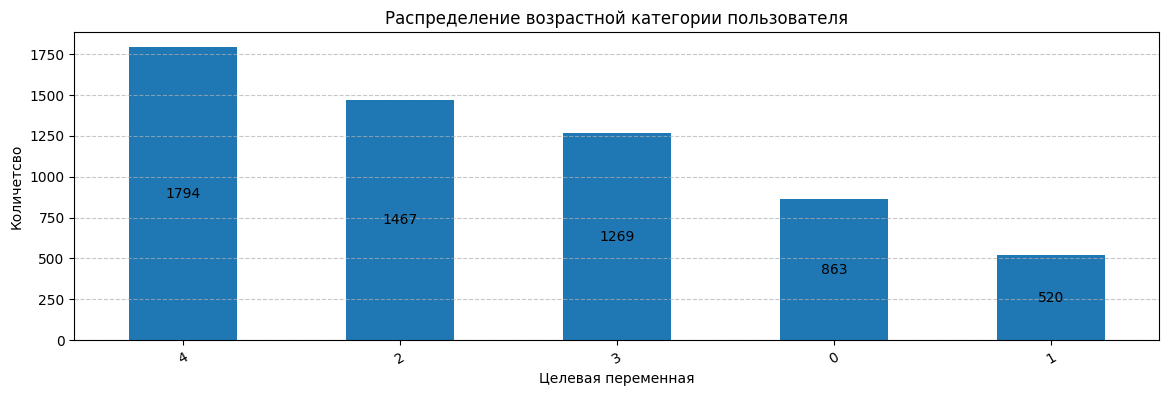

In [8]:
age_cat_counts = users_df['age_category'].value_counts()
show_bar_plot(age_cat_counts, 'возрастной категории пользователя', 'Целевая переменная')

Дисбаланс классов: Целевая переменная age_category имеет существенный дисбаланс. Классы 0 (младше 18) и 4 (56+ лет) представлены значительно меньше, чем классы 1-3. Это потребует использования балансировки классов или соответствующих метрик оценки.

---
<a id='6-bullet'></a>

#### 2.2 Анализ пропусков и дубликатов

In [9]:
def show_missing_stats(df):
    missing_stats = pd.DataFrame({
        'Кол-во пропусков': df.isna().sum(),
        'Доля пропусков': df.isna().mean() * 100
    })
    missing_stats = missing_stats[missing_stats['Кол-во пропусков'] > 0]
    
    if missing_stats.empty:
        return "Пропусков в данных нет"
    
    return missing_stats \
            .sort_values(by='Кол-во пропусков', ascending=False) \
            .style.format({'Доля пропусков': '{:.2f}%'}) \
            .background_gradient(cmap='coolwarm')

In [10]:
def short_df_analysis(df):
    print("Пропуски по столбцам:")
    display(show_missing_stats(df))
    
    total_duplicates = df.duplicated().sum()
    print("Явные дубликаты строк:", total_duplicates)
    print(f"Доля дубликатов от всех данных датасета: {round(total_duplicates / df.shape[0], 2)}%")
    print('-' * 30)

dfs = {
    "users": users_df,
    "visits": visits_df,
    "ads_activity": ads_activity_df,
    "surf_depth": surf_depth_df,
    "primary_device": primary_device_df,
    "cloud_usage": cloud_usage_df,
}.items()

for name, df in dfs:
    print(name)
    short_df_analysis(df)

users
Пропуски по столбцам:


'Пропусков в данных нет'

Явные дубликаты строк: 87
Доля дубликатов от всех данных датасета: 0.01%
------------------------------
visits
Пропуски по столбцам:


'Пропусков в данных нет'

Явные дубликаты строк: 15750
Доля дубликатов от всех данных датасета: 0.01%
------------------------------
ads_activity
Пропуски по столбцам:


'Пропусков в данных нет'

Явные дубликаты строк: 233
Доля дубликатов от всех данных датасета: 0.04%
------------------------------
surf_depth
Пропуски по столбцам:


'Пропусков в данных нет'

Явные дубликаты строк: 0
Доля дубликатов от всех данных датасета: 0.0%
------------------------------
primary_device
Пропуски по столбцам:


'Пропусков в данных нет'

Явные дубликаты строк: 0
Доля дубликатов от всех данных датасета: 0.0%
------------------------------
cloud_usage
Пропуски по столбцам:


'Пропусков в данных нет'

Явные дубликаты строк: 0
Доля дубликатов от всех данных датасета: 0.0%
------------------------------


In [11]:
for _, df in dfs:
    df.drop_duplicates(keep='first', inplace=True)
    print("Явные дубликаты строк:", df.duplicated().sum())

Явные дубликаты строк: 0
Явные дубликаты строк: 0
Явные дубликаты строк: 0
Явные дубликаты строк: 0
Явные дубликаты строк: 0
Явные дубликаты строк: 0


Качество данных: Пропуски в данных отсутствуют, что является большим плюсом. Однако обнаружены дубликаты в таблицах visits (15750) и ads_activity (233), которые были удалены. Разное количество записей в связанных таблицах требует проверки полноты данных для каждого пользователя.

---
<a id='7-bullet'></a>

#### 2.3 Анализ данных датасетов

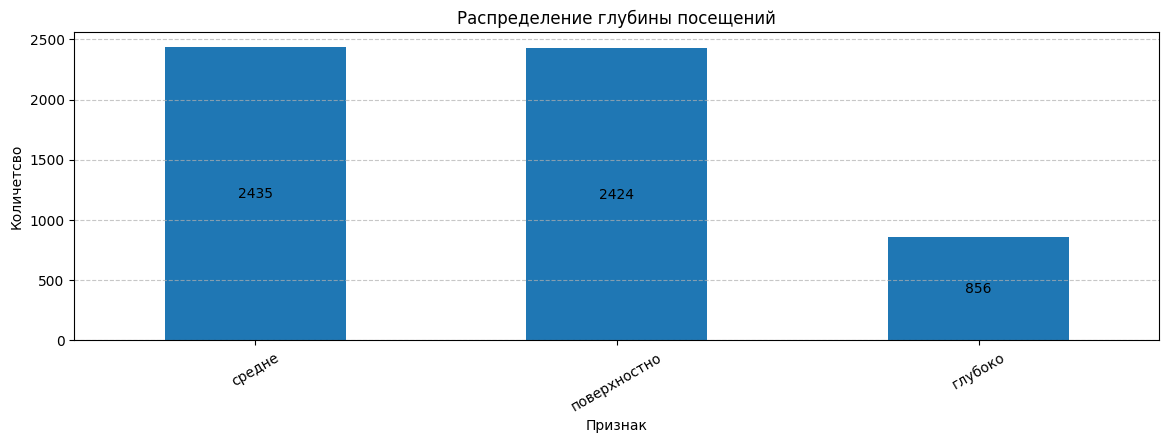

In [12]:
show_bar_plot(surf_depth_df["surf_depth"].value_counts(), 'глубины посещений')

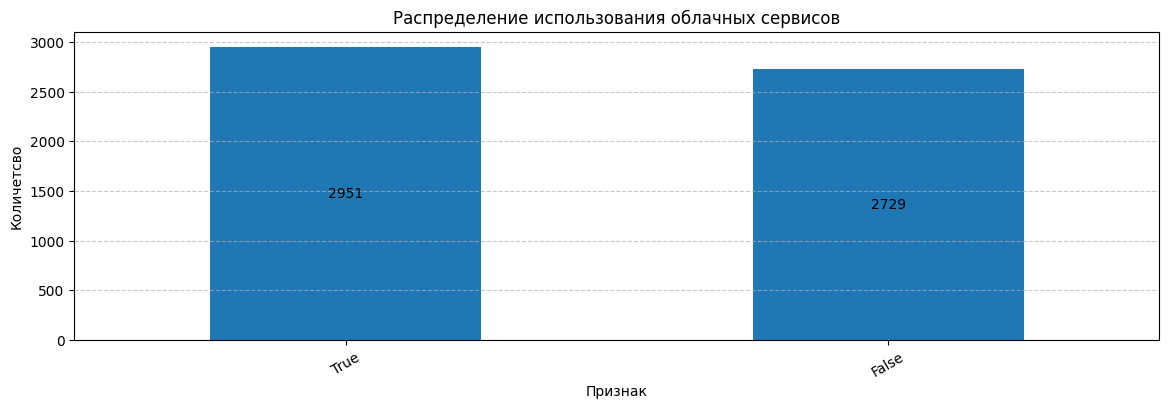

In [13]:
show_bar_plot(cloud_usage_df["cloud_usage"].value_counts(), 'использования облачных сервисов')

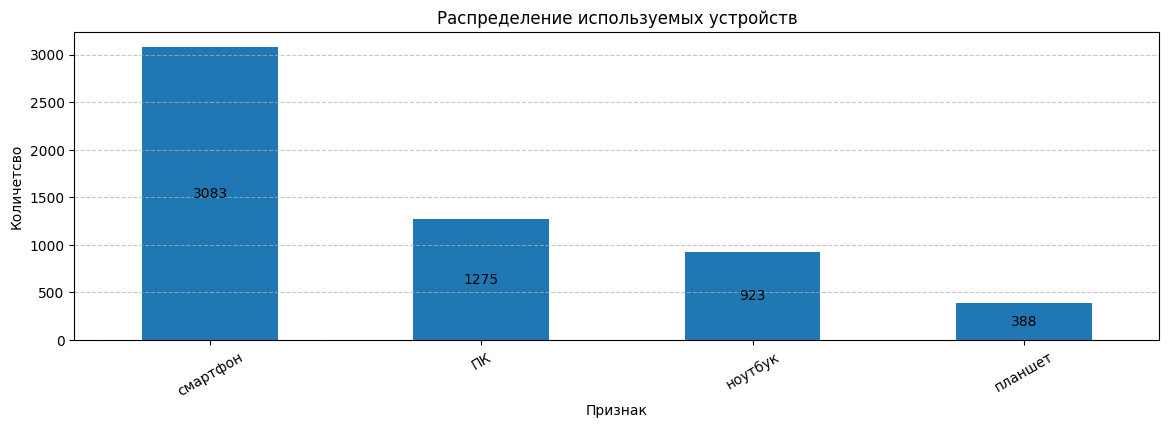

In [14]:
show_bar_plot(primary_device_df["primary_device"].value_counts(), 'используемых устройств')

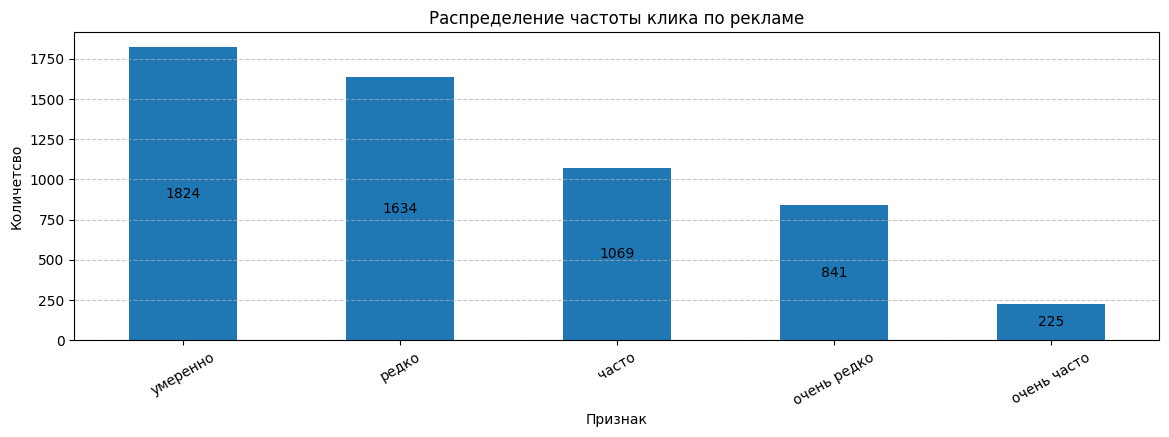

In [15]:
show_bar_plot(ads_activity_df["ads_activity"].value_counts(), 'частоты клика по рекламе')

Ключевые инсайты из графиков:

- Реклама: Пользователи чаще кликают «умеренно» или «редко». Агрессивная реклама может не сработать, так как гиперактивная аудитория минимальна.

- Устройства: Мобайл доминирует (смартфоны в 2.4 раза популярнее ПК). Адаптация под телефоны критически важна.

- Облака: Аудитория разделилась почти поровну (52% используют, 48% нет), что говорит о широком проникновении технологий.

- Вовлеченность: Большинство «скользит» по верхам или смотрит средне. Глубокое погружение в контент характерно лишь для 15% визитов, поэтому главное нужно показывать сразу.

---
<a id='8-bullet'></a>

#### 2.4 Анализ сессий по логам

In [16]:
def create_df_boxplot(data, name, ax):
    sns.boxplot(data=data, ax=ax)

    ax.set_title(f'Размах значений признака: {name}')
    ax.set_ylabel('Значение признака')

    ax.grid(True)
    ax.tick_params(axis='x', rotation=30)
    
    return ax

In [17]:
def get_emission_analysis(data, name):
    _, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 4))

    hist = axes[0]
    sns.histplot(
        data, 
        bins=50,
        ax=hist
    )

    hist.set_title(f'Распределение значений признака: {name}')
    hist.set_xlabel('Значение признака')
    hist.set_ylabel('Количество значений')
    hist.set_yscale('log')

    create_df_boxplot(data, name, axes[1])

    plt.show()
    
    plt.close()

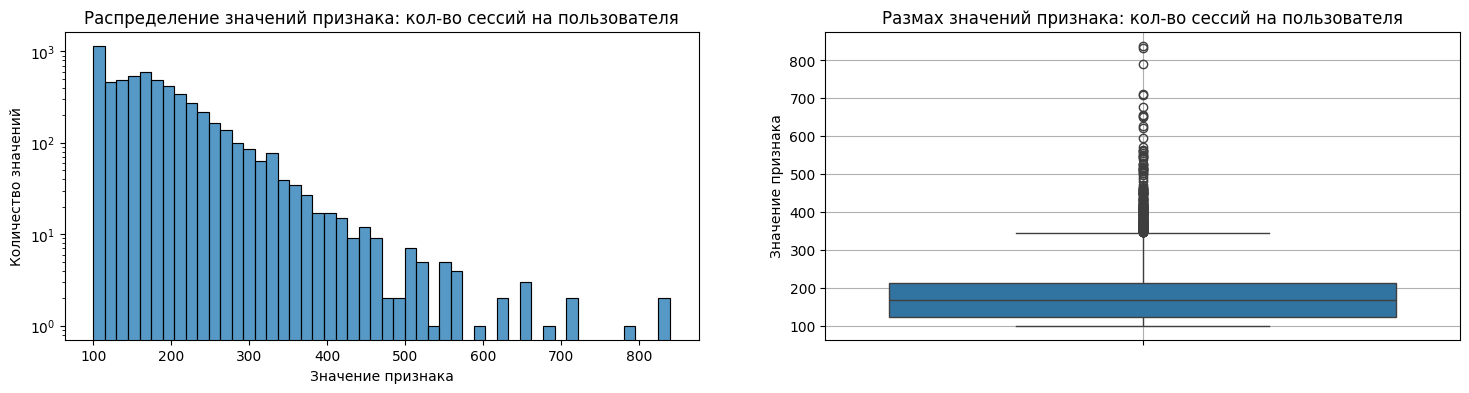

In [18]:
visits_per_user = visits_df.groupby("user_id")["session_id"].nunique()
get_emission_analysis(visits_per_user, 'кол-во сессий на пользователя')

Ярко выраженная асимметрия: Абсолютное большинство пользователей совершает небольшое количество сессий (медиана около 170, основной кластер - от 100 до 250).

Многочисленные выбросы: На диаграмме размаха (boxplot) видно огромное количество аномальных значений выше 350 сессий, доходящих до 800+. Возможно, это боты.

---
<a id='9-bullet'></a>

#### 2.5 Общая статистика всех пользователей по логам

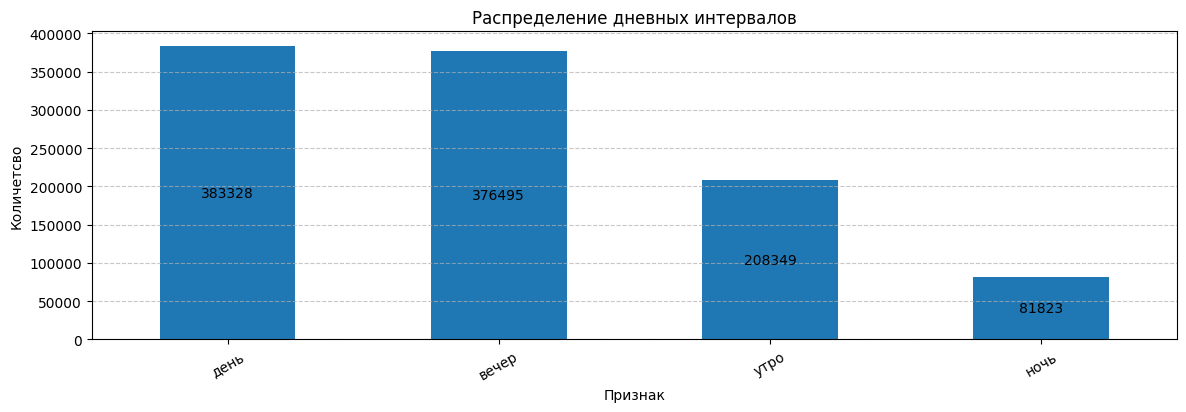

In [19]:
show_bar_plot(visits_df["daytime"].value_counts(), 'дневных интервалов')

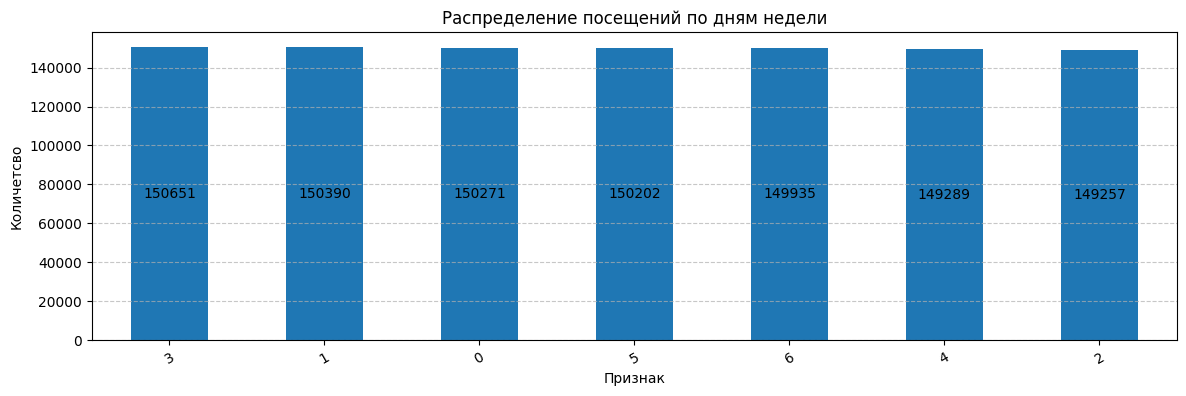

In [20]:
datetime = pd.to_datetime(visits_df["date"]).dt.weekday
show_bar_plot(datetime.value_counts(), 'посещений по дням недели')

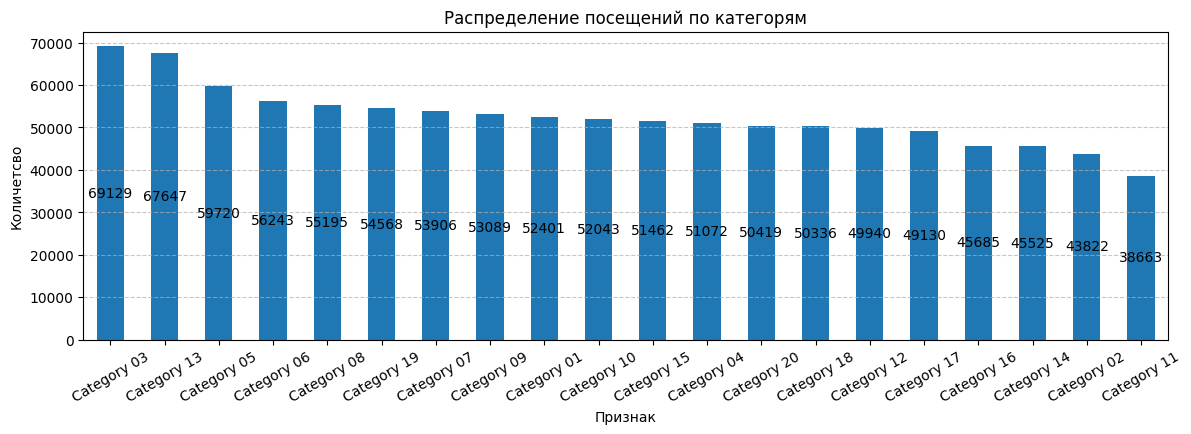

In [21]:
show_bar_plot(visits_df["website_category"].value_counts(), 'посещений по категорям')

Категории: Интересы размыты, явного лидера нет. Топ-3 (03, 13, 05) лишь ненамного опережают остальные.

Дни недели: Аномально ровная активность без спадов. 

Время суток: Люди активны днем и вечером. Ночью трафик падает в 4.5 раза, утром - в 2 раза по сравнению с пиком.

---
<a id='10-bullet'></a>

#### 2.6 Создание новых признаков

In [22]:
# Доля активности по категориям сайтов
cat_counts = (
    visits_df
    .groupby(["user_id", "website_category"])
    .size()
    .unstack(fill_value=0)
)
cat_shares = cat_counts.div(cat_counts.sum(axis=1), axis=0).fillna(0)
cat_shares = cat_shares.rename(columns=lambda x: x.replace('Category ', 'category_'))
display(pd.DataFrame(cat_shares).head())

# Доля активности по времени суток
day_counts = (
    visits_df
    .groupby(["user_id", "daytime"])
    .size()
    .unstack(fill_value=0)
)
day_shares = day_counts.div(day_counts.sum(axis=1), axis=0).fillna(0)
column_translations = {
        'утро': 'morning',
        'день': 'afternoon',
        'вечер': 'evening',
        'ночь': 'night'
    }
day_shares = day_shares.rename(columns=column_translations)
display(pd.DataFrame(day_shares.head()))

# Среднее количество сессий в день
sessions_per_day = (
    visits_df
    .groupby(["user_id", "date"])["session_id"]
    .nunique()
    .groupby("user_id")
    .mean()
    .rename("mean_sessions_per_day")
)
display(pd.DataFrame(sessions_per_day).head())

website_category,category_01,category_02,category_03,category_04,category_05,category_06,category_07,category_08,category_09,category_10,category_11,category_12,category_13,category_14,category_15,category_16,category_17,category_18,category_19,category_20
user_id,,,,,,,,,,,,,,,,,,,,
0010-5cf8f6b38a7b6c70a021-009dbcda,0.029304,0.000000,0.062271,0.042125,0.032967,0.053114,0.047619,0.075092,0.023810,0.040293,0.056777,0.078755,0.021978,0.034799,0.027473,0.060440,0.051282,0.078755,0.091575,0.091575
0013-4ae5f7d127b91a3fb0f8-ba59f141,0.081081,0.059459,0.027027,0.037838,0.081081,0.037838,0.048649,0.097297,0.059459,0.059459,0.070270,0.000000,0.064865,0.037838,0.016216,0.043243,0.064865,0.086486,0.005405,0.021622
0014-d3032d60979a8d2b3077-f09bdce8,0.008547,0.017094,0.034188,0.059829,0.068376,0.051282,0.042735,0.017094,0.034188,0.051282,0.000000,0.059829,0.170940,0.068376,0.059829,0.017094,0.076923,0.025641,0.102564,0.034188
001a-eee53e44f848608779b0-78704a67,0.066202,0.045296,0.034843,0.076655,0.034843,0.031359,0.041812,0.045296,0.045296,0.041812,0.048780,0.066202,0.000000,0.097561,0.041812,0.031359,0.045296,0.073171,0.073171,0.059233
002c-40a064b12e1217e12207-a56eaf3b,0.000000,0.053061,0.071429,0.061224,0.040816,0.038776,0.059184,0.018367,0.059184,0.065306,0.038776,0.085714,0.169388,0.000000,0.044898,0.040816,0.034694,0.012245,0.051020,0.055102


daytime,evening,afternoon,night,morning
user_id,,,,
0010-5cf8f6b38a7b6c70a021-009dbcda,0.413919,0.326007,0.095238,0.164835
0013-4ae5f7d127b91a3fb0f8-ba59f141,0.275676,0.372973,0.086486,0.264865
0014-d3032d60979a8d2b3077-f09bdce8,0.307692,0.384615,0.094017,0.213675
001a-eee53e44f848608779b0-78704a67,0.414634,0.334495,0.108014,0.142857
002c-40a064b12e1217e12207-a56eaf3b,0.295918,0.383673,0.069388,0.251020


,mean_sessions_per_day
user_id,
0010-5cf8f6b38a7b6c70a021-009dbcda,39.000000
0013-4ae5f7d127b91a3fb0f8-ba59f141,13.214286
0014-d3032d60979a8d2b3077-f09bdce8,8.357143
001a-eee53e44f848608779b0-78704a67,20.500000
002c-40a064b12e1217e12207-a56eaf3b,35.000000


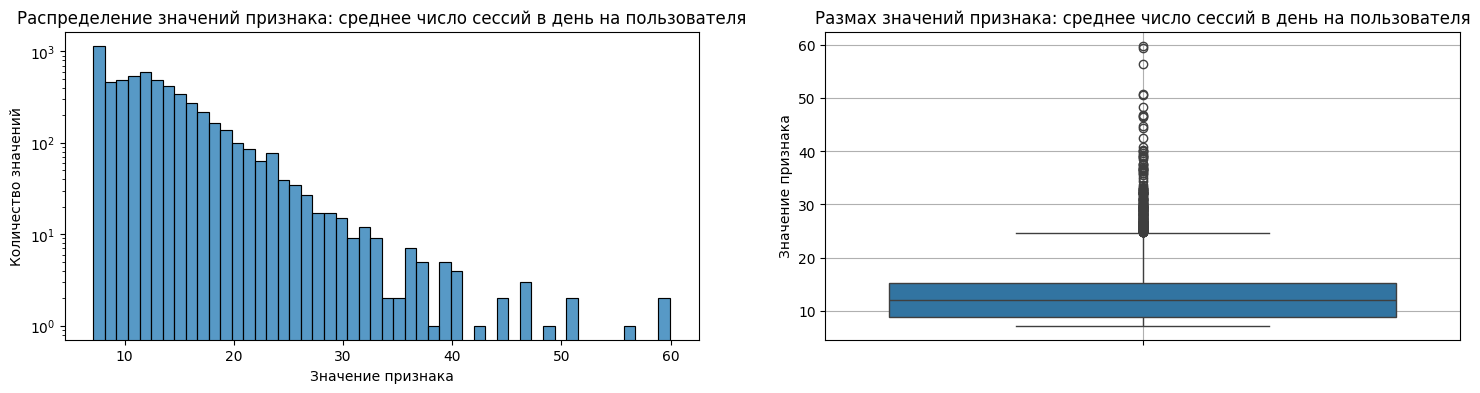

In [23]:
get_emission_analysis(sessions_per_day, 'среднее число сессий в день на пользователя')

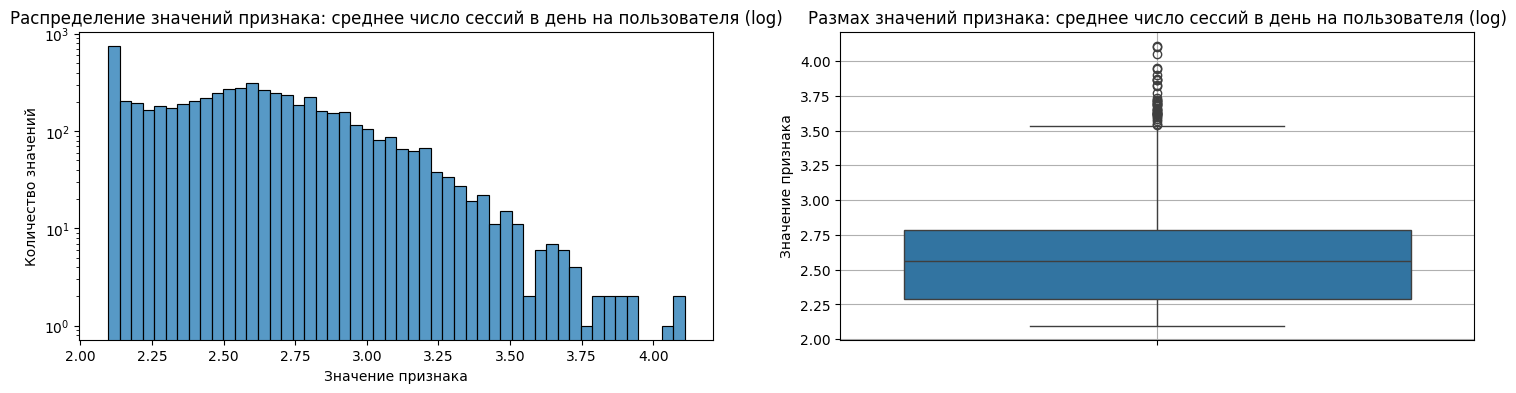

In [24]:
get_emission_analysis(np.log1p(sessions_per_day), 'среднее число сессий в день на пользователя (log)')

In [25]:
# любимое время суток
fav_daytime = day_shares.idxmax(axis=1).rename("fav_daytime")
display(pd.DataFrame(fav_daytime).head())

# любимая категория сайта
fav_website_category = cat_shares.idxmax(axis=1).rename("fav_website_category")
display(pd.DataFrame(fav_website_category).head())

,fav_daytime
user_id,
0010-5cf8f6b38a7b6c70a021-009dbcda,evening
0013-4ae5f7d127b91a3fb0f8-ba59f141,afternoon
0014-d3032d60979a8d2b3077-f09bdce8,afternoon
001a-eee53e44f848608779b0-78704a67,evening
002c-40a064b12e1217e12207-a56eaf3b,afternoon


,fav_website_category
user_id,
0010-5cf8f6b38a7b6c70a021-009dbcda,category_19
0013-4ae5f7d127b91a3fb0f8-ba59f141,category_08
0014-d3032d60979a8d2b3077-f09bdce8,category_13
001a-eee53e44f848608779b0-78704a67,category_14
002c-40a064b12e1217e12207-a56eaf3b,category_13


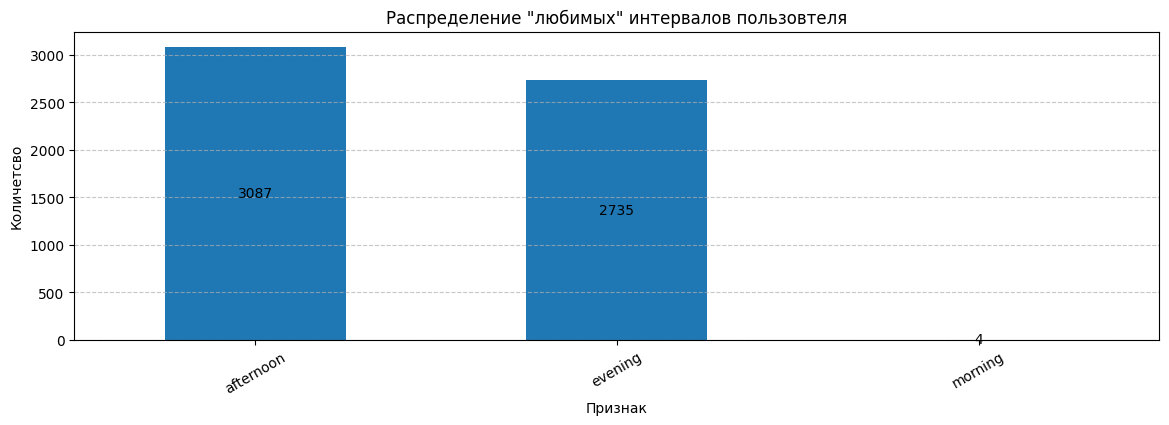

In [26]:
show_bar_plot(fav_daytime.value_counts(), '"любимых" интервалов пользовтеля')

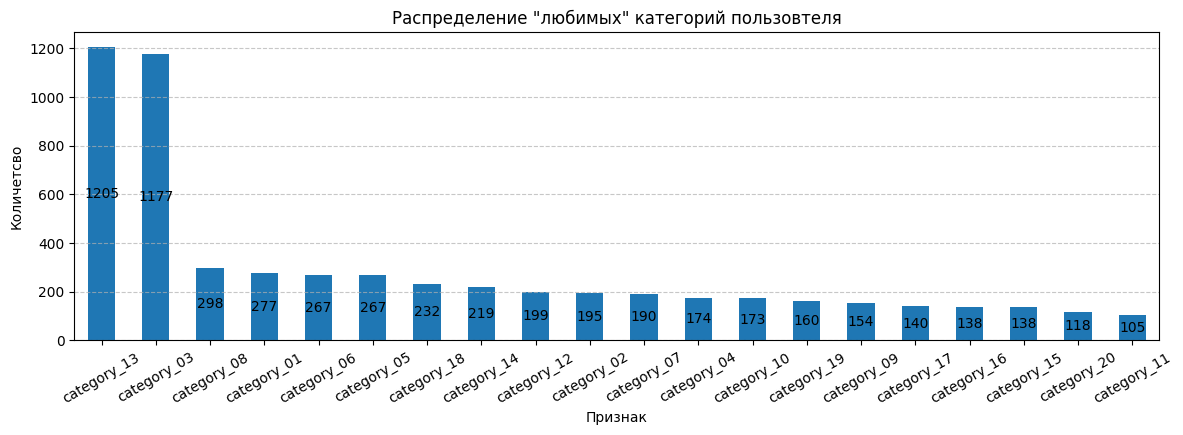

In [27]:
show_bar_plot(fav_website_category.value_counts(), '"любимых" категорий пользовтеля')

Интересы: Признак fav_website_category - мощный фильтр. Две категории (13 и 03) забирают самую большую долю внимания, остальные - в разы меньше.

Время: Признак fav_daytime делит всех на дневных и вечерних. Утренних типажей в выборке практически нет, ночные полностью отсутствуют.

Активность: Среднее число сессий в день (mean_sessions_per_day) распределено лучше, чем абсолютное, но все еще имеет выбросы, поэтому используется логарифмирование. 

---
<a id='11-bullet'></a>

#### 2.7 Функция для объединения таблиц

In [28]:
def build_feature_space(
    users,
    visits,
    ads_activity,
    surf_depth,
    primary_device,
    cloud_usage,
    expected_columns=None
):
    base = users.set_index("user_id")

    cat_counts = (
        visits
        .groupby(["user_id", "website_category"])
        .size()
        .unstack(fill_value=0)
    )
    cat_shares = cat_counts.div(cat_counts.sum(axis=1), axis=0).fillna(0)
    cat_shares = cat_shares.rename(columns=lambda x: x.replace('Category ', 'category_'))
    day_counts = (
        visits
        .groupby(["user_id", "daytime"])
        .size()
        .unstack(fill_value=0)
    )
    day_shares = day_counts.div(day_counts.sum(axis=1), axis=0).fillna(0)
    column_translations = {
        'утро': 'morning',
        'день': 'afternoon',
        'вечер': 'evening',
        'ночь': 'night'
    }
    day_shares = day_shares.rename(columns=column_translations)

    sessions_per_day = (
        visits.groupby(["user_id", "date"])["session_id"]
        .nunique()
        .groupby("user_id")
        .mean()
        .rename("mean_sessions_per_day")
    )

    fav_daytime = day_shares.idxmax(axis=1).rename("fav_daytime")
    fav_category = cat_shares.idxmax(axis=1).rename("fav_website_category")

    ads = ads_activity.set_index("user_id")
    depth = surf_depth.set_index("user_id")
    device = primary_device.set_index("user_id")
    cloud = cloud_usage.set_index("user_id")

    features = (
        base
        .join(cat_shares, how="left")
        .join(day_shares, how="left")
        .join(sessions_per_day, how="left")
        .join(fav_daytime, how="left")
        .join(fav_category, how="left")
        .join(ads, how="left")
        .join(depth, how="left")
        .join(device, how="left")
        .join(cloud, how="left")
    )
    
    if expected_columns is not None:
        missing_cols = set(expected_columns) - set(features.columns)
        for col in missing_cols:
            features[col] = 0
            
        features = features[expected_columns]
        
        useless_cols = set(features.columns) - set(expected_columns)
        if len(useless_cols) > 0:
            features = features.drop(columns=useless_cols)

    return features.reset_index()


---
<a id='12-bullet'></a>

#### 2.8 Общий анализ объединенного датафрейма

In [29]:
eda_df = build_feature_space(
    users_df, 
    visits_df, 
    ads_activity_df, 
    surf_depth_df,
    primary_device_df,
    cloud_usage_df
)

In [30]:
eda_df['mean_sessions_per_day'] = np.log1p(eda_df['mean_sessions_per_day'])

In [31]:
eda_df.head()

,user_id,age_category,category_01,category_02,category_03,category_04,category_05,category_06,category_07,category_08,category_09,category_10,category_11,category_12,category_13,category_14,category_15,category_16,category_17,category_18,category_19,category_20,evening,afternoon,night,morning,mean_sessions_per_day,fav_daytime,fav_website_category,ads_activity,surf_depth,primary_device,cloud_usage
0,f545-8c95aefe8d3e5548a689-a5b2fd39,4,0.064171,0.037433,0.037433,0.058824,0.101604,0.021390,0.000000,0.048128,0.101604,0.026738,0.074866,0.016043,0.032086,0.037433,0.053476,0.042781,0.058824,0.069519,0.074866,0.042781,0.336898,0.358289,0.074866,0.229947,2.664248,afternoon,category_05,NaN,глубоко,смартфон,False
1,cb48-5a0d6cde4d86ae10637e-c8ceb6ed,2,0.063830,0.042553,0.099291,0.021277,0.056738,0.035461,0.106383,0.106383,0.042553,0.070922,0.042553,0.042553,0.035461,0.000000,0.063830,0.035461,0.035461,0.028369,0.035461,0.035461,0.390071,0.340426,0.092199,0.177305,2.404368,evening,category_07,умеренно,средне,смартфон,False
2,678b-614cd47d854b9d591db2-000b2e50,0,0.010000,0.070000,0.000000,0.110000,0.070000,0.130000,0.000000,0.040000,0.000000,0.010000,0.030000,0.150000,0.120000,0.010000,0.020000,0.030000,0.020000,0.010000,0.110000,0.060000,0.380000,0.290000,0.130000,0.200000,2.097141,evening,category_12,умеренно,средне,смартфон,False
3,4ac0-dad169100b4a29b20818-b26ae7c5,4,0.080645,0.004032,0.100806,0.028226,0.108871,0.048387,0.028226,0.064516,0.060484,0.000000,0.064516,0.016129,0.076613,0.020161,0.024194,0.028226,0.064516,0.133065,0.036290,0.012097,0.258065,0.439516,0.072581,0.229839,2.929287,afternoon,category_18,редко,поверхностно,смартфон,True
4,f19b-9ac21ca973b41ecfa8c3-6a58191d,0,0.067227,0.042017,0.092437,0.033613,0.050420,0.008403,0.050420,0.067227,0.075630,0.042017,0.042017,0.126050,0.000000,0.084034,0.025210,0.025210,0.050420,0.033613,0.025210,0.058824,0.420168,0.344538,0.075630,0.159664,2.251292,evening,category_12,очень редко,поверхностно,смартфон,True


In [32]:
eda_df.shape

(5826, 33)

In [33]:
short_df_analysis(eda_df)

Пропуски по столбцам:


,Кол-во пропусков,Доля пропусков
ads_activity,233,4.00%
primary_device,157,2.69%
cloud_usage,146,2.51%
surf_depth,111,1.91%


Явные дубликаты строк: 0
Доля дубликатов от всех данных датасета: 0.0%
------------------------------


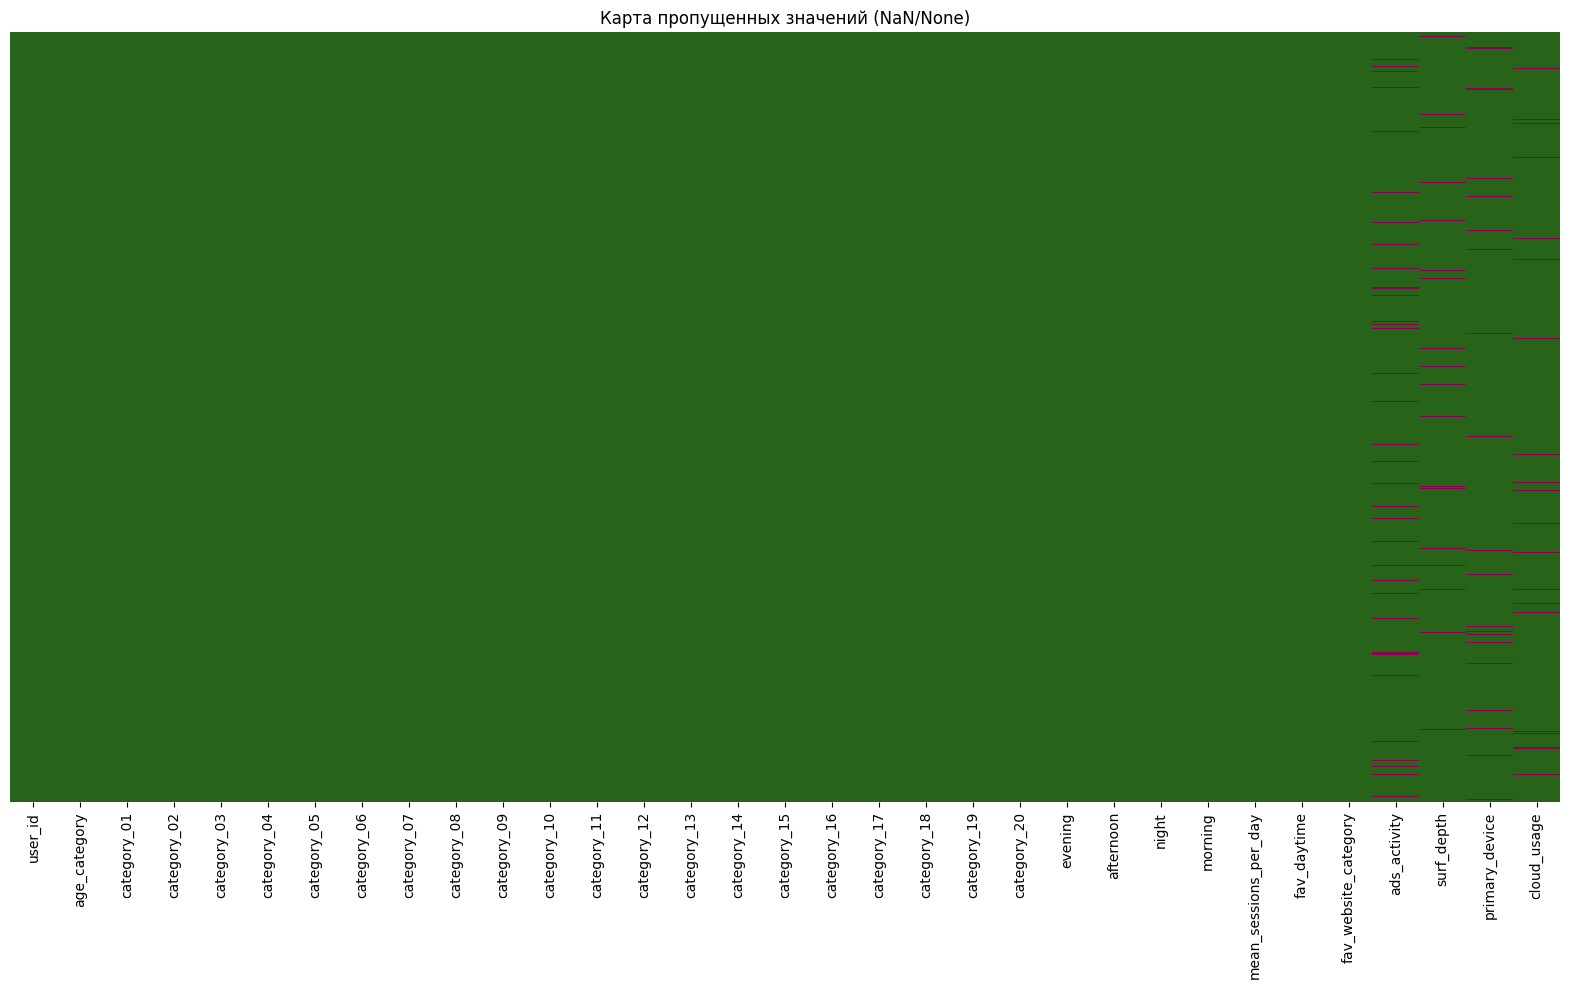

In [34]:
fig, ax = plt.subplots(figsize=(20,10)) 
sns.heatmap(eda_df.isna().astype(int), yticklabels=False, cbar=False, cmap='PiYG_r', xticklabels=eda_df.columns)

plt.title("Карта пропущенных значений (NaN/None)")
plt.show()

Пропущенные значения присутствуют в 4 признаках, но их доля невелика (от 1.91% до 4.00%). 

Пользователь есть в базе users, но его нет в таблицах. Это означает либо отсутствие действия, либо их незначительное количетсво.

In [35]:
eda_df['ads_activity'] = eda_df['ads_activity'].fillna('очень редко')
eda_df['cloud_usage'] = eda_df['cloud_usage'].astype('boolean').fillna(False)
eda_df['surf_depth'] = eda_df['surf_depth'].fillna('поверхностно')

most_frequent = eda_df['primary_device'].mode()[0]
eda_df['primary_device'] = eda_df['primary_device'].fillna(most_frequent)

In [36]:
short_df_analysis(eda_df)

Пропуски по столбцам:


'Пропусков в данных нет'

Явные дубликаты строк: 0
Доля дубликатов от всех данных датасета: 0.0%
------------------------------


---

In [37]:
eda_df.groupby('user_id')['user_id'].count().max()

np.int64(1)

**Группировка по user_id показала, что каждый пользователь встречается в итоговом датасете ровно один раз. Это гарантирует уникальность наблюдений и позволяет проводить разбиение на train/test без риска утечки данных.**

In [38]:
eda_df = eda_df.drop(columns=['user_id'])

---
<a id='13-bullet'></a>

#### 2.9 Анализ категориальных признаков

In [39]:
def check_cat_features(df):
    cat_df = df.select_dtypes(include=['object'])
    
    data = []
    for col in cat_df.columns:
        data.append({
            'Признак': col,
            'Уникальные значения': df[col].unique(),
            'Кол-во': df[col].nunique(),
        })
        
    return pd.DataFrame(data)

check_cat_features(eda_df)

,Признак,Уникальные значения,Кол-во
0,fav_daytime,"[afternoon, evening, morning]",3
1,fav_website_category,"[category_05, category_07, category_12, catego...",20
2,ads_activity,"[очень редко, умеренно, редко, очень часто, ча...",5
3,surf_depth,"[глубоко, средне, поверхностно]",3
4,primary_device,"[смартфон, ноутбук, ПК, планшет]",4


---

<a id='14-bullet'></a>

#### 2.10 Анализ матрицы корреляций

In [40]:
def create_heatmap(corr, title, x, y_coef):
    num_rows = len(corr)
    dynamic_height = max(5, num_rows * y_coef) 
    plt.figure(figsize=(x, dynamic_height)) 
    
    sns.heatmap(
        corr,
        annot=True,
        fmt='.2f',
        cmap='coolwarm',
        linewidths=.5,
        cbar=False,
    )
    
    plt.title(title)

    plt.show()

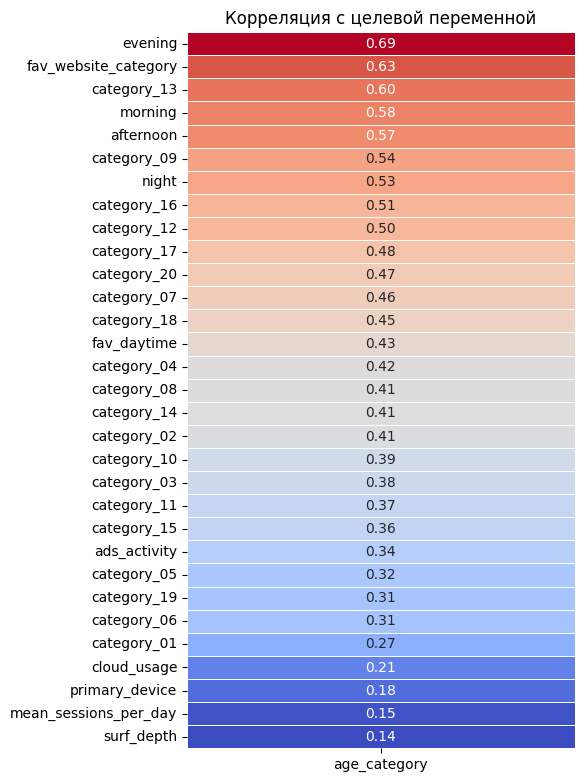

In [41]:
corr_matrix = eda_df.phik_matrix(njobs=3, interval_cols=['age_category', 'category_01', 'category_02', 'category_03', 'category_04', 'category_05', 'category_06', 'category_07', 'category_08', 'category_09', 'category_10', 'category_11', 'category_12', 'category_13', 'category_14', 'category_15', 'category_16', 'category_17', 'category_18', 'category_19', 'category_20', 'evening', 'afternoon', 'night', 'morning', 'mean_sessions_per_day'])
target_correlation = corr_matrix[corr_matrix.index != 'age_category'][['age_category']].sort_values(by='age_category', ascending=False)

create_heatmap(target_correlation, title='Корреляция с целевой переменной', x=5, y_coef=.3)

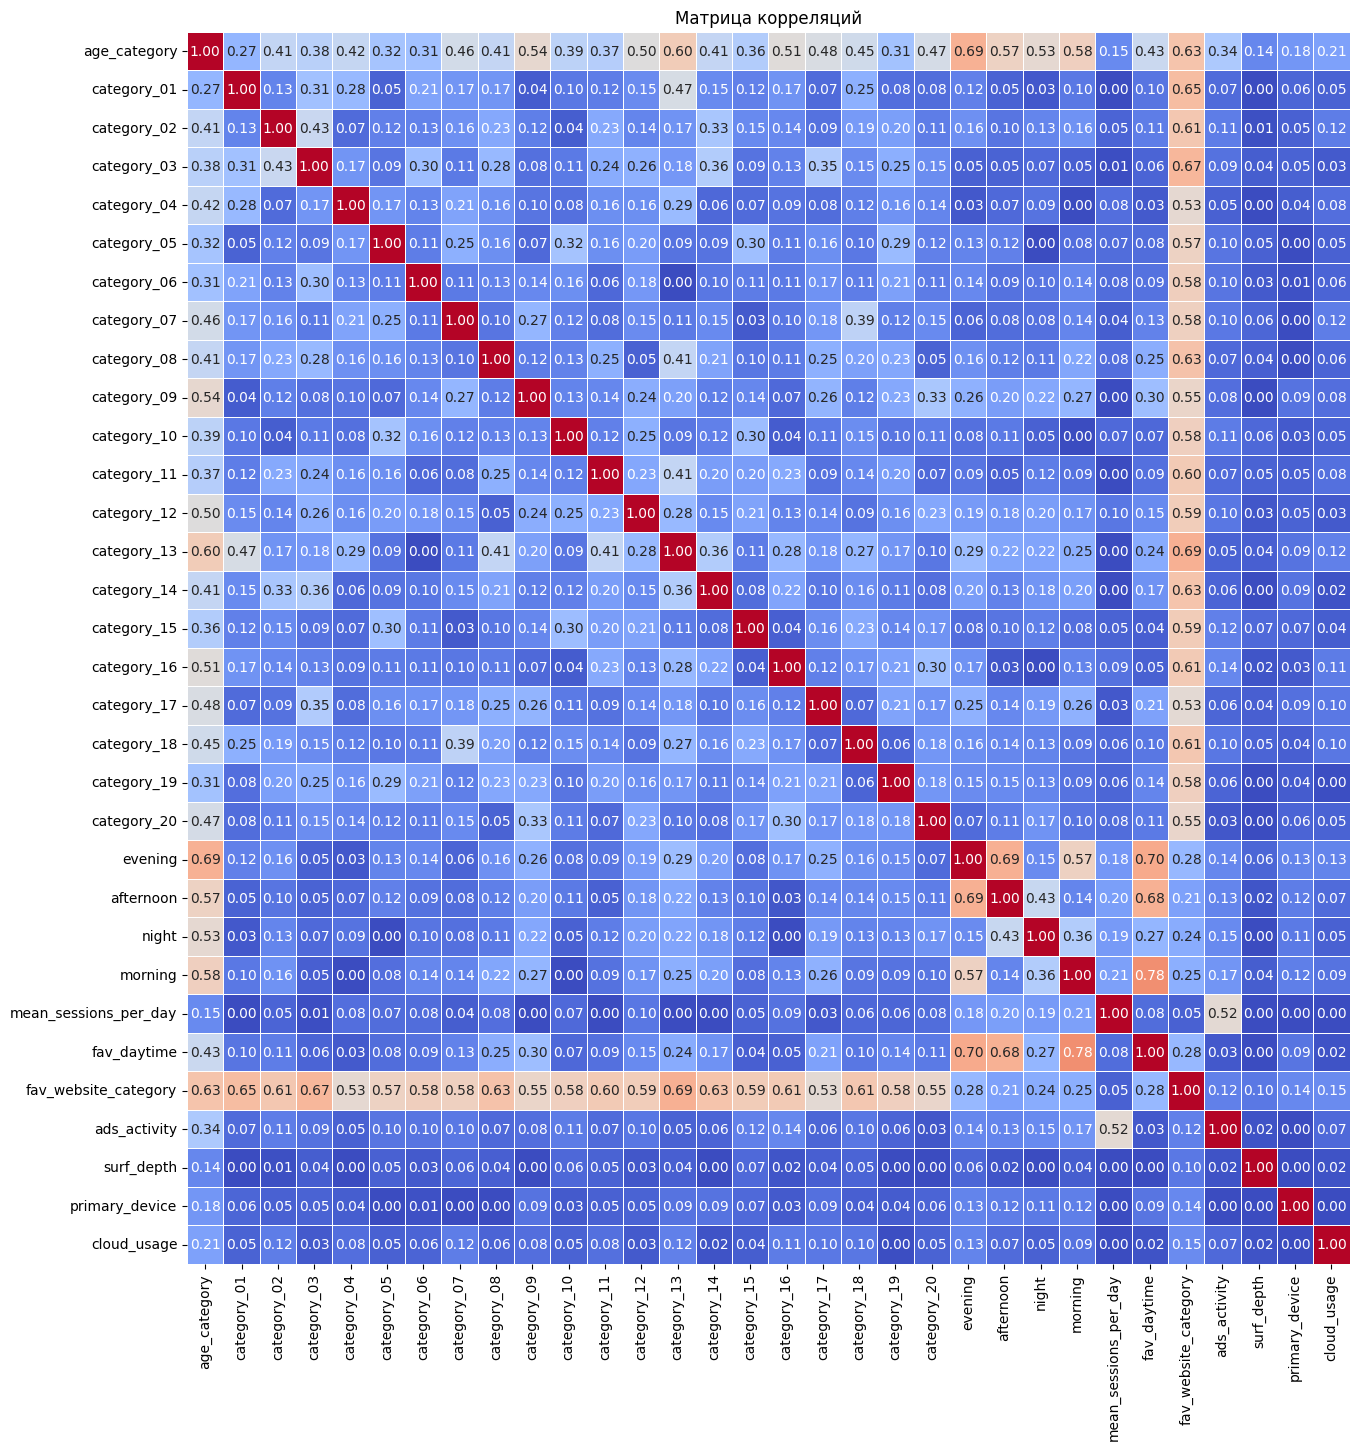

In [42]:
create_heatmap(corr_matrix, title='Матрица корреляций', x=15, y_coef=.5)

Анализ матрицы корреляций показал, что поведенческие паттерны определяют возраст гораздо точнее, чем просто техническая активность.

Ключевые наблюдения:
- Сильные сигналы: Лидерами стали время активности (evening: 0.69) и интересы (fav_website_category: 0.63). Режим дня и контент - главные маркеры возраста.
- Скрытый потенциал: Интенсивность сессий (mean_sessions_per_day: 0.07) линейно почти не влияет. Однако этот признак не будет удален: в сочетании с другими (например, "много сессий" + "ночь") он может стать значимым.

Вывод: Слабые признаки остаются в датасете. Их реальный вклад и возможные нелинейные связи будут проверены непосредственно при обучении модели с помощью L1-регуляризации.

---
<a id='15-bullet'></a>

#### 2.11 Итог EDA

По итогам EDA данные готовы к моделированию: 

- После объединения таблиц каждый user_id встречается один раз, а доля пропусков в ключевых признаках не превышает 4%, поэтому их можно безопасно импутировать без потери качества. 

- Поведенческие признаки (любимые категории, время суток, режим активности) дают самый сильный сигнал, тогда как количественные метрики сессий имеют тяжелые хвосты и потребуют логарифмирования при обучении модели.

- В данных присутствуют сильные сигналы для классификации возраста. Слабые признаки также сохранены для проверки нелинейных взаимосвязей на этапе обучения. Датасет полностью готов к построению baseline-модели.

---
<a id='16-bullet'></a>

## Предобработка данных

#### 3.1 Создание итогового датафрейма

In [43]:
df = build_feature_space(
    users_df, 
    visits_df, 
    ads_activity_df, 
    surf_depth_df,
    primary_device_df,
    cloud_usage_df
)

---
<a id='17-bullet'></a>

#### 3.2 Разделение на выборки

In [44]:
X = df.drop(columns=['user_id', 'age_category'])
y = df['age_category']

X_train_val, X_test, y_train_val, y_test = train_test_split(
    X,
    y,
    stratify=y,
    shuffle=True,
    test_size=.2,
    random_state=RANDOM_STATE
)

print(f"Размер обучающей выборки: {X_train_val.shape}")
print(f"Размер тестовой выборки: {X_test.shape}")
print(f"Среднее значенее целевой переменной в train: {y_train_val.mean():.3f}")
print(f"Среднее значенее целевой переменной в test: {y_test.mean():.3f}")

Размер обучающей выборки: (4660, 31)
Размер тестовой выборки: (1166, 31)
Среднее значенее целевой переменной в train: 2.441
Среднее значенее целевой переменной в test: 2.439


---
<a id='18-bullet'></a>

#### 3.3 Создание Pipeline

In [45]:

all_num_cols = X.select_dtypes(include=['number']).columns
all_cat_cols = X.select_dtypes(include=['object']).columns

log_num_cols = ['mean_sessions_per_day']
num_cols = [col for col in all_num_cols if col not in log_num_cols]

print(all_cat_cols)

Index(['fav_daytime', 'fav_website_category', 'ads_activity', 'surf_depth',
       'primary_device', 'cloud_usage'],
      dtype='object')


In [46]:
def bool_to_int(x):
    return x.astype(int)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', make_pipeline(
            SimpleImputer(strategy='median', add_indicator=True),
            StandardScaler()
        ), num_cols),
        
        ('num_log', make_pipeline(
            SimpleImputer(strategy='median', add_indicator=True),
            FunctionTransformer(np.log1p, feature_names_out="one-to-one"),
            StandardScaler()
        ), log_num_cols),
        
        ('cat_ohe_most_freq', make_pipeline(
            SimpleImputer(strategy='most_frequent'),
            OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False),
        ), ['fav_daytime', 'primary_device']),
        
        ('cat_ohe_const_ads', make_pipeline(
            SimpleImputer(strategy='constant', fill_value='очень редко'),
            OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False),
        ), ['ads_activity']),
        ('cat_ohe_const_surf', make_pipeline(
            SimpleImputer(strategy='constant', fill_value='поверхностно'),
            OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False),
        ), ['surf_depth']),

        ('cat_target_most_freq', make_pipeline(
            SimpleImputer(strategy='most_frequent'),
            TargetEncoder(),
        ), ['fav_website_category']),
        
        ('bool', make_pipeline(
            SimpleImputer(strategy='constant', fill_value=False),
            FunctionTransformer(bool_to_int)
        ), ['cloud_usage'])
    ], 
    verbose_feature_names_out=False
).set_output(transform="pandas")

In [47]:
X_transformed = preprocessor.fit_transform(X_train_val, y_train_val)
X_transformed.head()

,category_01,category_02,category_03,category_04,category_05,category_06,category_07,category_08,category_09,category_10,category_11,category_12,category_13,category_14,category_15,category_16,category_17,category_18,category_19,category_20,evening,afternoon,night,morning,mean_sessions_per_day,fav_daytime_evening,fav_daytime_morning,primary_device_ноутбук,primary_device_планшет,primary_device_смартфон,ads_activity_очень часто,ads_activity_редко,ads_activity_умеренно,ads_activity_часто,surf_depth_поверхностно,surf_depth_средне,fav_website_category,cloud_usage
1104,1.208529,-1.079856,1.375477,-0.514956,0.700415,0.684030,0.244927,1.236857,-0.936383,-0.181704,0.441162,-1.078518,-1.128835,-0.478136,-0.501751,1.391030,0.060412,-0.426709,-0.450620,-0.648151,1.451257,-0.843706,-0.987182,-0.222855,0.529072,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,2.475132,1
4145,0.584531,0.258694,-0.210796,-0.269015,0.094142,0.121908,0.018371,0.480114,-0.641350,-0.282778,1.362938,0.407784,-1.128835,1.201923,0.213435,-0.178206,0.074112,-0.555649,0.192812,-0.527467,-0.568494,0.940992,0.045140,-0.411464,2.144113,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.505953,0
3266,0.360198,2.156586,-0.556685,0.524631,-0.280058,0.136725,0.698696,-0.063702,-0.870345,-1.701976,-0.324568,1.476883,-1.098032,1.953114,-0.837669,-0.291488,-0.890916,-1.502752,1.496803,1.051042,0.479286,-1.023571,0.169325,0.483895,3.408483,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.904459,1
4277,0.102855,0.999727,-0.237712,-1.104691,-0.137520,-0.867225,1.683302,0.747617,-1.377562,0.142141,1.479224,1.150718,-1.128835,0.328364,-0.041523,0.140939,-0.597273,-0.383958,0.878081,-0.637261,0.779450,-1.400720,2.578956,-1.023115,0.002783,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.263158,1
5296,-0.593452,2.064350,-1.268656,-0.043821,0.457675,-0.518988,0.128008,0.315153,0.419974,1.570001,0.384491,1.788771,-0.020911,0.655780,-0.594219,0.137666,-0.801614,-0.510226,-1.542730,-1.111880,-1.533394,-0.232283,1.296420,1.397707,-0.761296,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.904459,0


In [48]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', DummyClassifier(strategy="stratified", random_state=RANDOM_STATE))
])

---

## Обучение и оценка базовой модели
<a id='19-bullet'></a>

#### 4.1 Разделение на стратифицированные фолды

In [49]:
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=RANDOM_STATE)

---
<a id='20-bullet'></a>

#### 4.2 Функции для оценки модели

In [50]:
def confusion_matrix_heatmap(matrix):
    ax = sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues')
    
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    ax.set_title(f'Матрица ошибок')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')
    
    plt.show()
    plt.close()

In [51]:
def evaluate_model(pipeline, X, y, cv, name="Model"):
    results = cross_validate(
        pipeline,
        X,
        y,
        cv=cv,
        scoring=["f1_macro"],
        return_estimator=True,
        n_jobs=4,
    )
    score = results["test_f1_macro"].mean()
    print(f"[{name}] F1 (macro): {score:.4f}")

    y_pred = cross_val_predict(pipeline, X, y, cv=cv)
    print("Результаты на тесте с новым порогом")
    print(classification_report(y, y_pred, zero_division=0))    

    confusion_matrix_heatmap(confusion_matrix(y, y_pred))

---
<a id='21-bullet'></a>

#### 4.3 Создание базовой модели

[Dummy Baseline] F1 (macro): 0.1925
Результаты на тесте с новым порогом
              precision    recall  f1-score   support

           0       0.13      0.14      0.13       853
           1       0.10      0.11      0.10       514
           2       0.25      0.25      0.25      1439
           3       0.20      0.21      0.20      1254
           4       0.29      0.26      0.27      1766

    accuracy                           0.22      5826
   macro avg       0.19      0.19      0.19      5826
weighted avg       0.22      0.22      0.22      5826



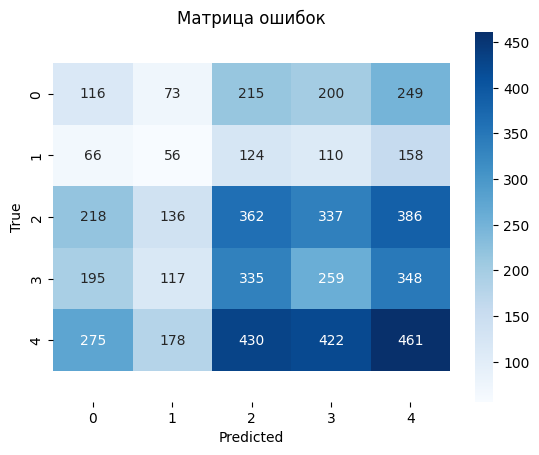

In [52]:
evaluate_model(pipeline, X, y, cv, "Dummy Baseline")

---
<a id='22-bullet'></a>

#### 4.4 Обучение многоклассовой логистической регрессии

[Multinomial Logistic Regression] F1 (macro): 0.8121
Результаты на тесте с новым порогом
              precision    recall  f1-score   support

           0       0.84      0.85      0.84       853
           1       0.57      0.72      0.63       514
           2       0.87      0.81      0.84      1439
           3       0.84      0.84      0.84      1254
           4       0.92      0.88      0.90      1766

    accuracy                           0.84      5826
   macro avg       0.81      0.82      0.81      5826
weighted avg       0.85      0.84      0.84      5826



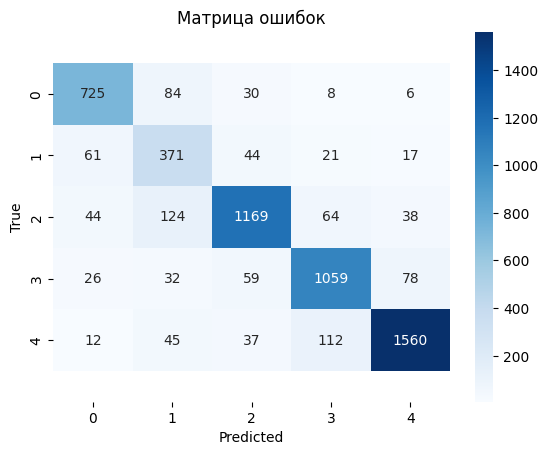

In [53]:
pipeline.set_params(model=LogisticRegression(solver="lbfgs", class_weight='balanced', random_state=RANDOM_STATE))
evaluate_model(pipeline, X, y, cv, "Multinomial Logistic Regression")

---

## Oтбор признаков
<a id='23-bullet'></a>

#### 5.1 Доработка Pipeline. Обучение многоклассовой логистической регрессии

In [54]:
lr_estimator = LogisticRegression(max_iter=1000, solver="lbfgs", class_weight='balanced', random_state=RANDOM_STATE)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    
    ('var_thresh', VarianceThreshold(threshold=.01)),
    ('correlation_filter', SelectKBest(score_func=f_classif, k='all')),
    ('rfe', RFE(estimator=lr_estimator, n_features_to_select=.95, step=5)),
    
    ('model', LogisticRegression(solver="lbfgs", class_weight='balanced', random_state=RANDOM_STATE))
])

[Multinomial Logistic Regression] F1 (macro): 0.8134
Результаты на тесте с новым порогом
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       853
           1       0.57      0.74      0.64       514
           2       0.87      0.81      0.84      1439
           3       0.84      0.84      0.84      1254
           4       0.92      0.89      0.90      1766

    accuracy                           0.84      5826
   macro avg       0.81      0.82      0.81      5826
weighted avg       0.85      0.84      0.84      5826



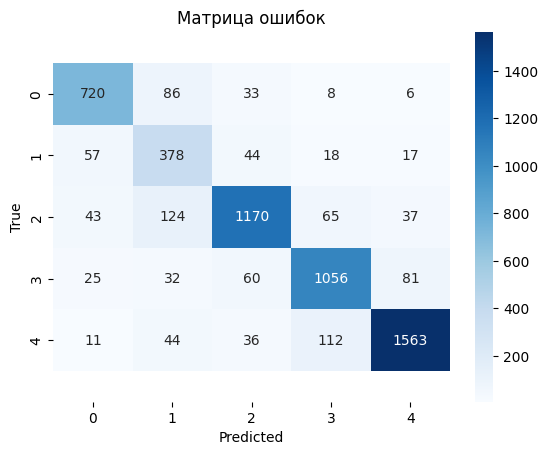

In [55]:
evaluate_model(pipeline, X, y, cv, "Multinomial Logistic Regression")

---

## Подбор гиперпараметров моделей
<a id='24-bullet'></a>

#### 6.1 Перебор гиперпараметров через Grid Search Cross Validate

In [56]:
param_grid = [
    {
        'model': [LogisticRegression(
            solver='lbfgs', 
            class_weight='balanced', 
            max_iter=3000,
            random_state=RANDOM_STATE,
        )],
        'model__C': [0.01, 0.1, 1, 10],
    },
    {
        'model': [LogisticRegression(
            solver='saga', 
            class_weight='balanced', 
            max_iter=3000,
            random_state=RANDOM_STATE
        )],
        'model__C': [0.01, 0.1, 1, 10],
        'model__l1_ratio': [0, 0.5, 1],
    },
    {
        'model': [OneVsOneClassifier(LinearSVC(class_weight='balanced', max_iter=3000, random_state=RANDOM_STATE))],
        'model__estimator__C': [0.01, 0.1, 1, 10],
        'model__estimator__penalty': ['l1', 'l2']
    },
    {
        'model': [OneVsOneClassifier(LogisticRegression(solver='saga', max_iter=3000, random_state=RANDOM_STATE))],
        'model__estimator__C': [0.01, 0.1, 1, 10],
        'model__estimator__l1_ratio': [0, 0.5, 1],
    },
    {
        'model': [OneVsRestClassifier(LinearSVC(class_weight='balanced', max_iter=3000, random_state=RANDOM_STATE))],
        'model__estimator__C': [0.01, 0.1, 1, 10],
        'model__estimator__penalty': ['l1', 'l2']
    },
    {
        'model': [OneVsRestClassifier(LogisticRegression(solver='saga', max_iter=3000, random_state=RANDOM_STATE))],
        'model__estimator__C': [0.01, 0.1, 1, 10],
        'model__estimator__l1_ratio': [0, 0.5, 1],
    }
]

In [57]:
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=cv,
    scoring='f1_macro',
    n_jobs=3,
    return_train_score=False
)

print("Начинаем подбор гиперпараметров...")
grid_search.fit(X_train_val, y_train_val)

Начинаем подбор гиперпараметров...


/Users/katsay/develop/ml/venv/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/katsay/develop/ml/venv/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/katsay/develop/ml/venv/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/katsay/develop/ml/venv/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/katsay/develop/ml/venv/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/katsay/develop/ml/venv/

,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",Pipeline(step...m_state=42))])
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","[{'model': [LogisticRegre...ndom_state=42)], 'model__C': [0.01, 0.1, ...]}, {'model': [LogisticRegre...solver='saga')], 'model__C': [0.01, 0.1, ...], 'model__l1_ratio': [0, 0.5, ...]}, ...]"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'f1_macro'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",3
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",StratifiedKFo... shuffle=True)
,"verbose verbose: intControls 

---
<a id='25-bullet'></a>

#### 6.2 Вывод топ-10 лучших моделей с их метриками и гиперпараметрами

In [58]:
results_df = pd.DataFrame(grid_search.cv_results_)

def get_model_name(estimator):
    if hasattr(estimator, 'estimator'):
        return f"{estimator.__class__.__name__}({estimator.estimator.__class__.__name__})"
    
    return estimator.__class__.__name__

results_df['Model'] = results_df['param_model'].apply(get_model_name)

def format_params(params):
    return ", ".join(
        f"{key.replace('model__', '')}={val}" 
        for key, val in params.items() 
        if key != 'model'
    )

results_df['Params'] = results_df['params'].apply(format_params)

columns_to_show = [
    'Model', 
    'Params', 
    'mean_test_score', 
    'std_test_score',
    'rank_test_score'
]

results_table = results_df[columns_to_show].sort_values(by='rank_test_score')
results_table.columns = ['Model', 'Hyperparameters', 'F1 (macro)', 'Std Dev', 'Rank']

print("Топ-10 лучших моделей:")
pd.set_option('display.max_colwidth', None)
results_table.head(10)

Топ-10 лучших моделей:


,Model,Hyperparameters,F1 (macro),Std Dev,Rank
27,OneVsOneClassifier(LogisticRegression),"estimator__C=0.1, estimator__l1_ratio=0",0.827477,0.024392,1
32,OneVsOneClassifier(LogisticRegression),"estimator__C=1, estimator__l1_ratio=1",0.826397,0.027137,2
31,OneVsOneClassifier(LogisticRegression),"estimator__C=1, estimator__l1_ratio=0.5",0.826064,0.026022,3
30,OneVsOneClassifier(LogisticRegression),"estimator__C=1, estimator__l1_ratio=0",0.826036,0.025986,4
19,OneVsOneClassifier(LinearSVC),"estimator__C=0.1, estimator__penalty=l2",0.825739,0.022981,5
18,OneVsOneClassifier(LinearSVC),"estimator__C=0.1, estimator__penalty=l1",0.825327,0.020782,6
17,OneVsOneClassifier(LinearSVC),"estimator__C=0.01, estimator__penalty=l2",0.824318,0.020331,7
20,OneVsOneClassifier(LinearSVC),"estimator__C=1, estimator__penalty=l1",0.824100,0.024334,8
23,OneVsOneClassifier(LinearSVC),"estimator__C=10, estimator__penalty=l2",0.824049,0.024068,9
22,OneVsOneClassifier(LinearSVC),"estimator__C=10, estimator__penalty=l1",0.823493,0.023806,10


---

## Финальная модель
<a id='26-bullet'></a>

#### 7.1 Вывод лучших гиперпараметров


In [59]:
print(f"Лучшие параметры: {grid_search.best_params_}")
print(f"Лучший результат валидации (F1 macro): {grid_search.best_score_:.4f}")

Лучшие параметры: {'model': OneVsOneClassifier(estimator=LogisticRegression(max_iter=3000, random_state=42,
                                                solver='saga')), 'model__estimator__C': 0.1, 'model__estimator__l1_ratio': 0}
Лучший результат валидации (F1 macro): 0.8275


---
<a id='27-bullet'></a>

#### 7.2 Финальная проверка модели на тестовой выборке

In [60]:
def evaluate_model(y_true, y_pred):
    metrics = {
        'accuracy': accuracy_score(y_true, y_pred),
        'precision_macro': precision_score(y_true, y_pred, average='macro'),
        'precision_micro': precision_score(y_true, y_pred, average='micro'),
        'precision_weighted': precision_score(y_true, y_pred, average='weighted'),
        'recall_macro': recall_score(y_true, y_pred, average='macro'),
        'recall_micro': recall_score(y_true, y_pred, average='micro'),
        'recall_weighted': recall_score(y_true, y_pred, average='weighted'),
        'f1_macro': f1_score(y_true, y_pred, average='macro'),
        'f1_micro': f1_score(y_true, y_pred, average='micro'),
        'f1_weighted': f1_score(y_true, y_pred, average='weighted'),
    }
    return metrics

Результаты на тесте


,One vs Rest
accuracy,0.839623
precision_macro,0.806888
precision_micro,0.839623
precision_weighted,0.837979
recall_macro,0.800706
recall_micro,0.839623
recall_weighted,0.839623
f1_macro,0.803521
f1_micro,0.839623
f1_weighted,0.838662



              precision    recall  f1-score   support

           0       0.80      0.80      0.80       171
           1       0.64      0.58      0.61       103
           2       0.82      0.84      0.83       288
           3       0.86      0.86      0.86       251
           4       0.91      0.92      0.91       353

    accuracy                           0.84      1166
   macro avg       0.81      0.80      0.80      1166
weighted avg       0.84      0.84      0.84      1166




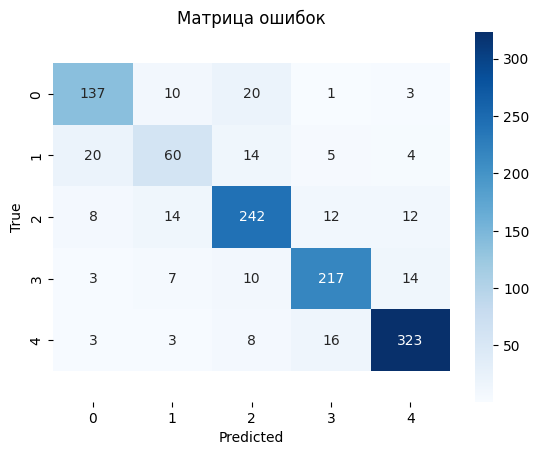

In [61]:
y_pred = grid_search.predict(X_test)
results_ovr = evaluate_model(y_test, y_pred)
df_results = pd.DataFrame({'One vs Rest': {k: v for k, v in results_ovr.items()}})

print("Результаты на тесте")
display(df_results)
print()
print(classification_report(y_test, y_pred, zero_division=0))    
print()
confusion_matrix_heatmap(confusion_matrix(y_test, y_pred))

---

## Подготовка артефактов модели для внедрения
<a id='28-bullet'></a>

#### 8.1 Локальное сохранение модели

In [62]:
model_file_name = 'model.joblib'

metadata = {
    'model_version': '1.0.0',
    'training_date': '2026-01-18',
    'best_score': grid_search.best_score_,
    'best_params': grid_search.best_params_,
    'python_version': sys.version,
    'sklearn_version': sklearn.__version__,
    'pandas_version': pd.__version__,
    'numpy_version': np.__version__
}

joblib.dump({
    'model': grid_search.best_estimator_,
    'build_feature_space': build_feature_space,
    'feature_names': X.columns.tolist(),
    'metadata': metadata,
}, model_file_name)

print(f"Объект сохранён в файл {model_file_name}") 

Объект сохранён в файл model.joblib


---
<a id='29-bullet'></a>

#### 8.2 Тестирование модели. Создание сервиса для использования модели

In [63]:
user_id = 'f545-8c95aefe8d3e5548a689-a5b2fd39'

user = pd.DataFrame([{'user_id': user_id}])
visits = visits_df[visits_df['user_id'] == user_id]
ads_activity = ads_activity_df[ads_activity_df['user_id'] == user_id]
surf_depth = surf_depth_df[surf_depth_df['user_id'] == user_id]
primary_device = primary_device_df[primary_device_df['user_id'] == user_id]
cloud_usage = cloud_usage_df[cloud_usage_df['user_id'] == user_id]

In [64]:
class WebVisitorAgePredictionService:
    def __init__(self, model_path):
        self.model = joblib.load(model_path)
    
    def predict_age_category(self, user, visits, ads_activity, surf_depth, primary_device, cloud_usage):
        build_feature_space = self.model['build_feature_space']
        feature_names = self.model['feature_names']
        user_profile = build_feature_space(user, visits, ads_activity, surf_depth, primary_device, cloud_usage, feature_names)
    
        return self.model['model'].predict(user_profile)[0]

In [65]:
service = WebVisitorAgePredictionService(model_file_name)
result = service.predict_age_category(user, visits, ads_activity, surf_depth, primary_device, cloud_usage)

print(f"Возрастная категория пользователя (user_id {user_id}): {result}")

Возрастная категория пользователя (user_id f545-8c95aefe8d3e5548a689-a5b2fd39): 4


---

## Выводы о результатах работы
<a id='30-bullet'></a>

#### Выводы

- Лучшая модель: OneVsOne Classifier + Logistic Regression

- Гиперпараметры: C=0.1, l1_ratio=0 (L2 регуляризация)

- F1 Score: 0.8279 (Rank №1 из 56 конфигураций)

**Разработана готовая к внедрению модель машинного обучения, которая по анонимным цифровым следам пользователя (история посещений, активность с рекламой, глубина просмотра и др.) предсказывает его возрастную категорию с качеством 80% по метрике F1 macro.**

- Проблема дисбаланса учтена. Выбор macro F1-score в качестве ключевой метрики заставил модель одинаково хорошо учиться на всех возрастных группах, а не только на самых частых.

- Работоспособный пайплайн для продакшена. Есть воспроизводимый конвейер обработки данных, обученная модель упакована в Pipeline, сохранен код для преобразования новых данных. Это минимизирует риски при переносе в промышленную среду.

- Качество значительно улучшилось. Финальная модель достигла F1 macro - 0.80, что в 4 раза выше показателя Dummy Baseline (0.19). Accuracy вырос с 0.22 до 0.84, что подтверждает реальную способность модели разделять классы, а не просто угадывать мажоритарный класс.​